In [1]:
import rasterio as rio
from rasterio.plot import plotting_extent
import rasterio.plot
import numpy as np
from topolib.subsetDat import subsetBBox;
from topolib import gda_lib;
from pyproj import Proj, transform
from icepyx import icesat2data as ipd
%matplotlib inline
import matplotlib.pyplot as plt 
import sys
import glob

# Visualize the raster

In [2]:
#path to raster
#raster_path = '/home/jovyan/shared/data-aragon/ASO_3M_PCDTM_USCOGE_20180908_20180913.tif'
#raster_path = '/home/jovyan/shared/data-aragon/ASO_3M_PCDTM_USCOCM_20180912_20180913.tif'
#raster_path = '/home/jovyan/shared/data-aragon/ASO_3M_PCDTM_USCOGT_20180912_20180913.tif'
raster_path = '/home/jovyan/shared/data-aragon/ASO_3M_PCDTM_USCATE_20191010_20191010.tif'



In [3]:
ds = rio.open(raster_path)
dem = ds.read(1)
dem = np.ma.masked_equal(dem,gda_lib.get_ndv(ds))
xmin,ymin,xmax,ymax = ds.bounds
ds.crs

CRS.from_epsg(32611)

In [4]:
raster = rio.open(raster_path)
raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 21623,
 'height': 18653,
 'count': 1,
 'crs': CRS.from_epsg(32611),
 'transform': Affine(3.0, 0.0, 242715.0,
        0.0, -3.0, 4234848.0)}

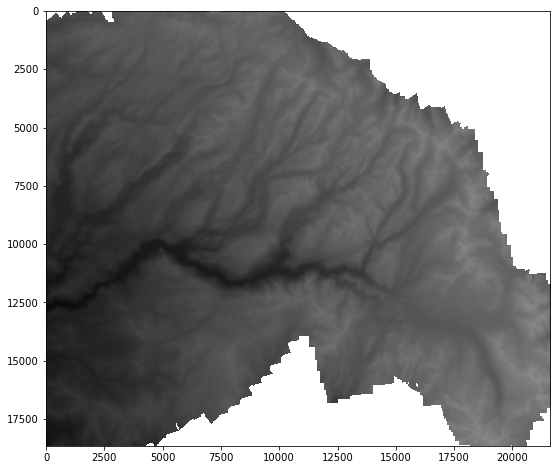

In [5]:
fig,ax = plt.subplots(figsize=(10,8))

rio.plot.show(dem, ax=ax,cmap='gray')

In [6]:
[L,B,R,T] = subsetBBox(raster_path,raster.crs,'epsg:4326') # now read projection from DEM, convert to WGS84
    #[L,B,R,T] = subsetBBox(raster,'epsg:32611','epsg:4326')
    # Area of interest
boundaries = {
    'LowerLeft_Lon': L,
    'LowerLeft_Lat': B,
    'UpperRight_Lon': R,
    'UpperRight_Lat': T,
}
L,B,R,T

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.

(-119.91910216526328,
 37.721153213268956,
 -119.19868268078534,
 38.24106453792272)

# Find Icesat2 data within domain
From intro-is-files Notebook

In [9]:
from pathlib import Path

# Our data folder 
#data_home = Path('/home/jovyan/tutorial-data/land_ice_applications/PIG_ATL06')
data_home = Path('/home/jovyan/shared/data-aragon/ATL03_CA')
                 
# Create folder if it doesn't exist
data_home.mkdir(exist_ok=True)

In [8]:
from icepyx import icesat2data as ipd

short_name = 'ATL03'
spatial_extent = [L,B,R,T]
date_range = ['2019-10-07','2019-10-09']

# spatial_extent = [148, -81, 162, -80]  # Byrd
# date_range = ['2018-10-14','2018-12-22']

region = ipd.Icesat2Data(short_name, spatial_extent, date_range)

product:     ATL03
dates:       ['2019-10-07', '2019-10-09']
start time:  00:00:00
end time:    23:59:59
version:     003
extent:      ['bounding box', [-119.91910216526328, 37.721153213268956, -119.19868268078534, 38.24106453792272]]

DATA:
('Number of available granules', 1)
('Average size of granules (MB)', 6298.1412725449)
('Total size of all granules (MB)', 6298.1412725449)


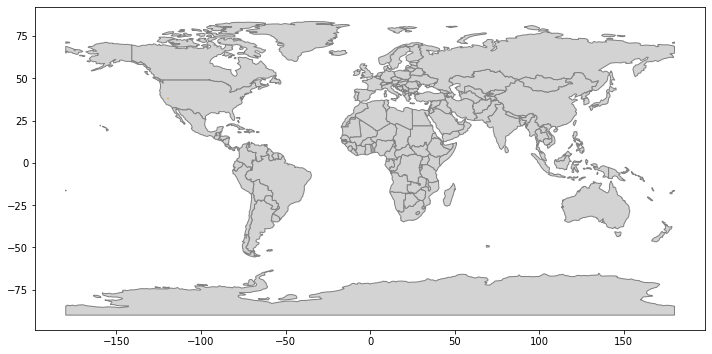

In [9]:
print('product:    ', region.dataset)
print('dates:      ', region.dates)
print('start time: ', region.start_time)
print('end time:   ', region.end_time)
print('version:    ', region.dataset_version)
print('extent:     ', region.spatial_extent)

print('\nDATA:')
print('\n'.join([str(item) for item in region.avail_granules().items()]))

region.visualize_spatial_extent()

In [15]:
#build and view the parameters that will be submitted in our query
region.CMRparams

{'short_name': 'ATL03',
 'version': '003',
 'temporal': '2019-10-07T00:00:00Z,2019-10-09T23:59:59Z',
 'bounding_box': '-119.91910216526328,37.721153213268956,-119.19868268078534,38.24106453792272'}

In [13]:
#get a list of the available granule IDs that meet your search criteria
region.avail_granules(ids=True)

['ATL03_20191008182255_01810506_003_01.h5']

# Download the data

In [10]:
name = 'nina.aragon7'
email = 'aragonch@oregonstate.edu'

# Only download if data folder is empty
if not list(data_home.glob('*.h5')):
    region.earthdata_login(name, email)
    region.download_granules(data_home)

Earthdata Login password:  ········


Total number of data order requests is  1  for  1  granules.
Data request  1  of  1  is submitting to NSIDC
order ID:  5000000701284
Initial status of your order request at NSIDC is:  processing
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please contin

In [10]:
files = list(data_home.glob('*.h5'))

for f in files[:10]: print(f)
print('Total number of files:', len(files))

/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01.h5
Total number of files: 1


# Plot the ATL03 data 
From land_ice_applications Notebook

In [37]:
# the usual suspects:
import numpy as np
import matplotlib.pyplot as plt

# specialty modules
import h5py
import pyproj

# run matplotlib in 'widget' mode
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from readers.read_HDF5_ATL03 import read_HDF5_ATL03
from readers.get_ATL03_x_atc import get_ATL03_x_atc

In [34]:
data_root='/home/jovyan/shared/data-aragon/'

In [47]:
# read the data:
rgt="0615"
cycle="04"
# read the IS2 data with Tyler's ATL03 reader:
ATL03_file=glob.glob(os.path.join(data_root, 'download', f'*{rgt}{cycle}*.h5'))[0]
#ATL03_file
IS2_atl03_mds, IS2_atl03_attrs, IS2_atl03_beams =read_HDF5_ATL03(ATL03_file)
# add x_atc to the ATL03 data structure (this function adds to the LS2_ATL03_mds dictionary)
get_ATL03_x_atc(IS2_atl03_mds, IS2_atl03_attrs, IS2_atl03_beams)

In [48]:
#-- select the beam from ATL03
D3 = IS2_atl03_mds['gt3l']

#-- create scatter plot of photon data (e.g., photon elevation vs x_atc)
fig=plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(D3['heights']['x_atc'], D3['heights']['h_ph'],'k.',markersize=0.25, label='all photons')
LMH=D3['heights']['signal_conf_ph'][:,3] >= 2
ax.plot(D3['heights']['x_atc'][LMH], D3['heights']['h_ph'][LMH],'g.',markersize=0.5, label='flagged photons')
h_leg=ax.legend()

ax.set_xlabel('x_atc, m')
ax.set_ylabel('h, m')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Holoviews

In [1]:
import xarray as xr
import hvplot.xarray
import s3fs

In [10]:
# copy an ATL03 file to disk (I've put one from the ATL03/ATL06 tutorial in the hackweek s3 bucket)
!aws s3 cp s3://icesat2hack2020/pangeo-demo/ATL03_20190928165055_00270510_003_01.h5 /srv/scratch/ATL03_20190928165055_00270510_003_01.h5

download: s3://icesat2hack2020/pangeo-demo/ATL03_20190928165055_00270510_003_01.h5 to ../../../../../srv/scratch/ATL03_20190928165055_00270510_003_01.h5


In [11]:
!ls -lh /srv/scratch/ATL03_20190928165055_00270510_003_01.h5

-rw-r--r-- 1 jovyan root 2.3G Jun  4 21:55 /srv/scratch/ATL03_20190928165055_00270510_003_01.h5


In [51]:
filePath='/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01.h5'
#filePath='/home/jovyan/shared/data-aragon/ATL03/processed_ATL03_20190903191210_10340406_003_01.h5'
#filePath='/srv/scratch/ATL03_20190928165055_00270510_003_01.h5'
group = 'gt1l/heights'
gt1l = xr.open_dataset(filePath, group=group, engine='h5netcdf')
gt1l

<xarray.Dataset>
Dimensions:         (delta_time: 934992, ds_surf_type: 5)
Coordinates:
  * delta_time      (delta_time) datetime64[ns] 2019-10-08T18:28:29.619966496 ... 2019-10-08T18:28:37.769766680
    lat_ph          (delta_time) float64 ...
    lon_ph          (delta_time) float64 ...
Dimensions without coordinates: ds_surf_type
Data variables:
    dist_ph_across  (delta_time) float32 ...
    dist_ph_along   (delta_time) float32 ...
    h_ph            (delta_time) float32 ...
    pce_mframe_cnt  (delta_time) uint32 ...
    ph_id_channel   (delta_time) uint8 ...
    ph_id_count     (delta_time) int8 ...
    ph_id_pulse     (delta_time) uint8 ...
    signal_conf_ph  (delta_time, ds_surf_type) int8 ...
Attributes:
    Description:  Contains arrays of the parameters for each received photon.
    data_rate:    Data are stored at the photon detection rate.

In [65]:
npoints = int(gt1l.delta_time.size / 1e6)
npoints

0

In [53]:
gt1l.delta_time.size

934992

In [54]:
npoints = int(gt1l.delta_time.size / 1e6)
print(f'This group contains ~{npoints} million points!')
print(f'group dataset size is ~{gt1l.nbytes/1e9:.2f} Gb')

This group contains ~0 million points!
group dataset size is ~0.04 Gb


In [55]:
# Extract categorized detections
cols = ['h_ph', 'signal_conf_ph']

landice = gt1l[cols].sel(ds_surf_type=3)
land = gt1l[cols].sel(ds_surf_type=1)
land

<xarray.Dataset>
Dimensions:         (delta_time: 934992)
Coordinates:
    lat_ph          (delta_time) float64 ...
  * delta_time      (delta_time) datetime64[ns] 2019-10-08T18:28:29.619966496 ... 2019-10-08T18:28:37.769766680
    lon_ph          (delta_time) float64 ...
Data variables:
    h_ph            (delta_time) float32 ...
    signal_conf_ph  (delta_time) int8 ...
Attributes:
    Description:  Contains arrays of the parameters for each received photon.
    data_rate:    Data are stored at the photon detection rate.

In [56]:
landice

<xarray.Dataset>
Dimensions:         (delta_time: 934992)
Coordinates:
    lat_ph          (delta_time) float64 ...
  * delta_time      (delta_time) datetime64[ns] 2019-10-08T18:28:29.619966496 ... 2019-10-08T18:28:37.769766680
    lon_ph          (delta_time) float64 ...
Data variables:
    h_ph            (delta_time) float32 ...
    signal_conf_ph  (delta_time) int8 ...
Attributes:
    Description:  Contains arrays of the parameters for each received photon.
    data_rate:    Data are stored at the photon detection rate.

In [57]:
# Retain only 'noise' and 'signal' in this category of points
ds_landice = landice.where(landice.signal_conf_ph >=0, drop=True)
ds_land = land.where(land.signal_conf_ph >=0, drop=True)
ds_land

<xarray.Dataset>
Dimensions:         (delta_time: 0)
Coordinates:
    lat_ph          (delta_time) float64 
  * delta_time      (delta_time) datetime64[ns] 
    lon_ph          (delta_time) float64 
Data variables:
    h_ph            (delta_time) float32 
    signal_conf_ph  (delta_time) float64 
Attributes:
    Description:  Contains arrays of the parameters for each received photon.
    data_rate:    Data are stored at the photon detection rate.

In [58]:
# Above lines promote any int dtypes to float64 for some reason,,, can reassign as int8
ds_landice['signal_conf_ph'] = ds_landice.signal_conf_ph.astype('int8')
ds_land['signal_conf_ph'] = ds_land.signal_conf_ph.astype('int8')
ds_land

<xarray.Dataset>
Dimensions:         (delta_time: 0)
Coordinates:
    lat_ph          (delta_time) float64 
  * delta_time      (delta_time) datetime64[ns] 
    lon_ph          (delta_time) float64 
Data variables:
    h_ph            (delta_time) float32 
    signal_conf_ph  (delta_time) int8 
Attributes:
    Description:  Contains arrays of the parameters for each received photon.
    data_rate:    Data are stored at the photon detection rate.

In [59]:
nland = int(ds_land.delta_time.size / 1e6)
nlandice = int(ds_landice.delta_time.size / 1e6)
print(f'~{nland} million valid land points!')
print(f'~{nlandice} million valid landice points!')

~0 million valid land points!
~0 million valid landice points!


In [60]:
all_points = gt1l.h_ph.hvplot.scatter(x='delta_time', datashade=True, cmap='greys')
land_points = ds_land.h_ph.hvplot.scatter(x='delta_time', datashade=True, cmap='greens')
landice_points = ds_landice.h_ph.hvplot.scatter(x='delta_time', datashade=True, cmap='blues')
all_points * land_points * landice_points

:DynamicMap   []
   :Overlay
      .RGB.I   :RGB   [delta_time,h_ph]   (R,G,B,A)
      .RGB.II  :RGB   [delta_time,h_ph]   (R,G,B,A)
      .RGB.III :RGB   [delta_time,h_ph]   (R,G,B,A)

In [61]:
# extract variables of interest into a pandas dataframe
df = ds_landice[['h_ph','signal_conf_ph']].to_dataframe()
df.head()

h_ph  signal_conf_ph     lat_ph  \
delta_time                                                              
2019-10-08 18:28:32.235066560  3006.913818               0  38.074151   
2019-10-08 18:28:32.235066560  2955.320557               0  38.074151   
2019-10-08 18:28:32.235066560  2851.281738               0  38.074149   
2019-10-08 18:28:32.235066560  2795.295898               0  38.074148   
2019-10-08 18:28:32.235066560  2748.559814               2  38.074147   

                                   lon_ph  
delta_time                                 
2019-10-08 18:28:32.235066560 -119.444152  
2019-10-08 18:28:32.235066560 -119.444164  
2019-10-08 18:28:32.235066560 -119.444186  
2019-10-08 18:28:32.235066560 -119.444198  
2019-10-08 18:28:32.235066560 -119.444208

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672330 entries, 2019-10-08 18:28:32.235066560 to 2019-10-08 18:28:37.769766680
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   h_ph            672330 non-null  float32
 1   signal_conf_ph  672330 non-null  int8   
 2   lat_ph          672330 non-null  float64
 3   lon_ph          672330 non-null  float64
dtypes: float32(1), float64(2), int8(1)
memory usage: 18.6 MB


In [63]:
# Colorby signal strength flag 
import hvplot.pandas

colormap={0:'grey', 1: 'black', 2: 'yellow', 3:'orange', 4:'red' }
df.hvplot.scatter(x='delta_time', y='h_ph', by='signal_conf_ph', datashade=True, dynspread=True, cmap=colormap,
                  width=1000, height=500)

:DynamicMap   []
   :RGB   [delta_time,h_ph]   (R,G,B,A)

# Extract height data 

In [9]:
datafolderOut = '/home/jovyan/shared/data-aragon/ATL03_CA/'
# glob to list of files
ATL03_list = glob.glob(datafolderOut +'*01.h5')
ATL03_list

['/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01.h5']

In [10]:
# Specify the variables of interest
LIce_var = ['atl06_quality_summary','delta_time','h_li','hli_sigma',\
           'latitude','longitude','segment_id','sigma_geo_h']

# read hdf5 into a geodataframe
dataset_dict={'land_ice_segments':LIce_var, 'land_ice_segments/ground_track':['x_atc']}

In [12]:
## add recursively
ATL06_gdf_list = [gda_lib.ATL06_2_gdf(x,dataset_dict) for x in ATL03_list]
ATL06_gdf_list = [x.to_crs(ds.crs) for x in ATL06_gdf_list]
ATL06_gdf_list;
big_gdf = gda_lib.concat_gdf(ATL06_gdf_list)

/home/jovyan/topohack/topolib/gda_lib.py:33: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(filename) as h5f:


UnboundLocalError: local variable 'df_final' referenced before assignment